In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
data=keras.datasets.mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
import matplotlib.pyplot as plt

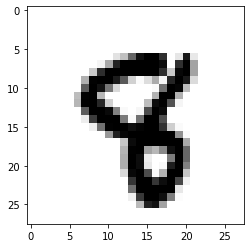

In [ ]:
plt.imshow(X_train[34567],cmap='binary')

In [ ]:
X_train=X_train.reshape((60000,28,28,1))

In [ ]:
X_test=X_test.reshape((10000,28,28,1))

In [ ]:
X_train=X_train.astype('float32')/255

In [ ]:
X_test=X_test.astype('float32')/255

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
model=keras.models.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=X_train.shape[1:]))

In [ ]:
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.add(keras.layers.MaxPooling2D((2,2)))

In [ ]:
model.add(keras.layers.Dropout(.25))

In [ ]:
model.add(keras.layers.Flatten())

In [ ]:
model.add(keras.layers.Dense(128,activation='relu'))

In [ ]:
model.add(keras.layers.Dropout(0.25))

In [ ]:
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 3ms/step - loss: 0.1347 - accuracy: 0.9589
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0535 - accuracy: 0.9831
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0377 - accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0292 - accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0224 - accuracy: 0.9926


In [ ]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9893


In [ ]:
print(test_loss,test_accuracy)

0.03456377238035202 0.989300012588501
